In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import folium
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('combined_crime-data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
print(df.head())


            STATE/UT  YEAR  POPULATION  MALES  FEMALES  MALES(per_100k)  \
0        A&N Islands  2001         356    193      163      54213.48315   
1     Andhra Pradesh  2001       76210  38527    37683      50553.73311   
2  Arunachal Pradesh  2001        1098    580      518      52823.31512   
3              Assam  2001       26656  13777    12878      51684.42377   
4              Bihar  2001       82999  43244    39755      52101.83255   

   FEMALES(per_100k)  TOTAL IPC CRIMES  TOTAL IPC CRIMES(per_100k)  ARSON  \
0        45786.51685              1316                 369662.9213      8   
1        49446.26689            260178                 341396.1422   1744   
2        47176.68488              4684                 426593.8069     26   
3        48311.82473             73754                 276688.1753    882   
4        47898.16745            176864                 213091.7240   1004   

   ...  RAPE  RAPE(per_100k)  RIOTS  RIOTS(per_100k)  ROBBERY  \
0  ...     6     1685

In [16]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 67 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   STATE/UT                                                       468 non-null    object 
 1   YEAR                                                           468 non-null    int64  
 2   POPULATION                                                     468 non-null    int64  
 3   MALES                                                          468 non-null    int64  
 4   FEMALES                                                        468 non-null    int64  
 5   MALES(per_100k)                                                468 non-null    float64
 6   FEMALES(per_100k)                                              468 non-null    float64
 7   TOTAL IPC CRIMES                                              

,YEAR,POPULATION,MALES,FEMALES,MALES(per_100k),FEMALES(per_100k),TOTAL IPC CRIMES,TOTAL IPC CRIMES(per_100k),ARSON,ARSON(per_100k),...,RAPE,RAPE(per_100k),RIOTS,RIOTS(per_100k),ROBBERY,ROBBERY(per_100k),THEFT,THEFT(per_100k),OTHER IPC CRIMES,OTHER IPC CRIMES(per_100k)
count,468.000000,4.680000e+02,468.000000,468.000000,468.000000,468.000000,4.680000e+02,4.680000e+02,468.000000,468.000000,...,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,4.680000e+02,468.000000
mean,2007.000000,6.264352e+04,32420.014957,30223.487179,52319.677200,47678.034116,2.272511e+05,3.669125e+05,1051.803419,2466.705675,...,2332.000000,4671.908675,7239.769231,12057.737852,2394.820513,3716.323898,33103.863248,63377.275681,9.312354e+04,146229.477838
std,3.745661,1.849519e+05,95752.760991,89201.690243,2474.357351,2476.736231,6.735570e+05,1.717978e+05,3128.201116,2059.719093,...,7037.057768,3398.193071,21584.484891,12340.134765,7264.803576,2783.211504,98506.358262,56545.641146,2.771932e+05,102157.522752
min,2001.000000,6.100000e+01,31.000000,30.000000,48582.016900,33788.395900,6.200000e+01,9.253731e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,10526.315790,1.000000e+01,15625.000000
25%,2004.000000,1.447000e+03,774.500000,664.750000,50784.987212,47299.064970,4.973000e+03,2.354293e+05,38.000000,1082.401789,...,62.000000,2257.289991,69.000000,5182.553296,43.500000,1610.005155,988.000000,32893.754325,1.461000e+03,74355.310297
50%,2007.000000,2.018150e+04,10585.500000,9240.500000,51782.102715,48227.486120,7.085900e+04,3.577626e+05,246.000000,2072.635806,...,707.000000,3760.576991,1267.000000,8613.848077,485.000000,3408.066224,8748.000000,46055.859550,2.195500e+04,111857.580700
75%,2010.000000,5.984600e+04,30806.250000,28772.000000,52700.932622,49215.012788,2.378565e+05,4.434632e+05,874.000000,3228.338622,...,2004.000000,5948.934084,5226.500000,16205.717403,1701.000000,5049.891506,32996.500000,66719.041640,9.396900e+04,197327.947675
max,2013.000000,1.223581e+06,633505.000000,590076.000000,65870.307170,51421.123710,5.295444e+06,1.006645e+06,23672.000000,18290.515430,...,67414.000000,20275.590550,152444.000000,117333.333300,63854.000000,17266.187050,745244.000000,357266.811300,2.185250e+06,682925.158400


In [17]:
# crime category aggregates (using normal columns for counts)
df['Property_Crimes'] = df[['AUTO THEFT', 'BURGLARY', 'THEFT', 'CHEATING']].sum(axis=1)
df['Violent_Crimes'] = df[['MURDER', 'ATTEMPT TO MURDER', 'RAPE', 'HURT/GREVIOUS HURT']].sum(axis=1)
df['Gender_Based_Crimes'] = df[['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 
                               'CRUELTY BY HUSBAND OR HIS RELATIVES', 'DOWRY DEATHS']].sum(axis=1)

# per_100k versions of aggregates
df['Property_Crimes(per_100k)'] = df['Property_Crimes'] / df['POPULATION'] * 100000
df['Violent_Crimes(per_100k)'] = df['Violent_Crimes'] / df['POPULATION'] * 100000
df['Gender_Based_Crimes(per_100k)'] = df['Gender_Based_Crimes'] / df['POPULATION'] * 100000


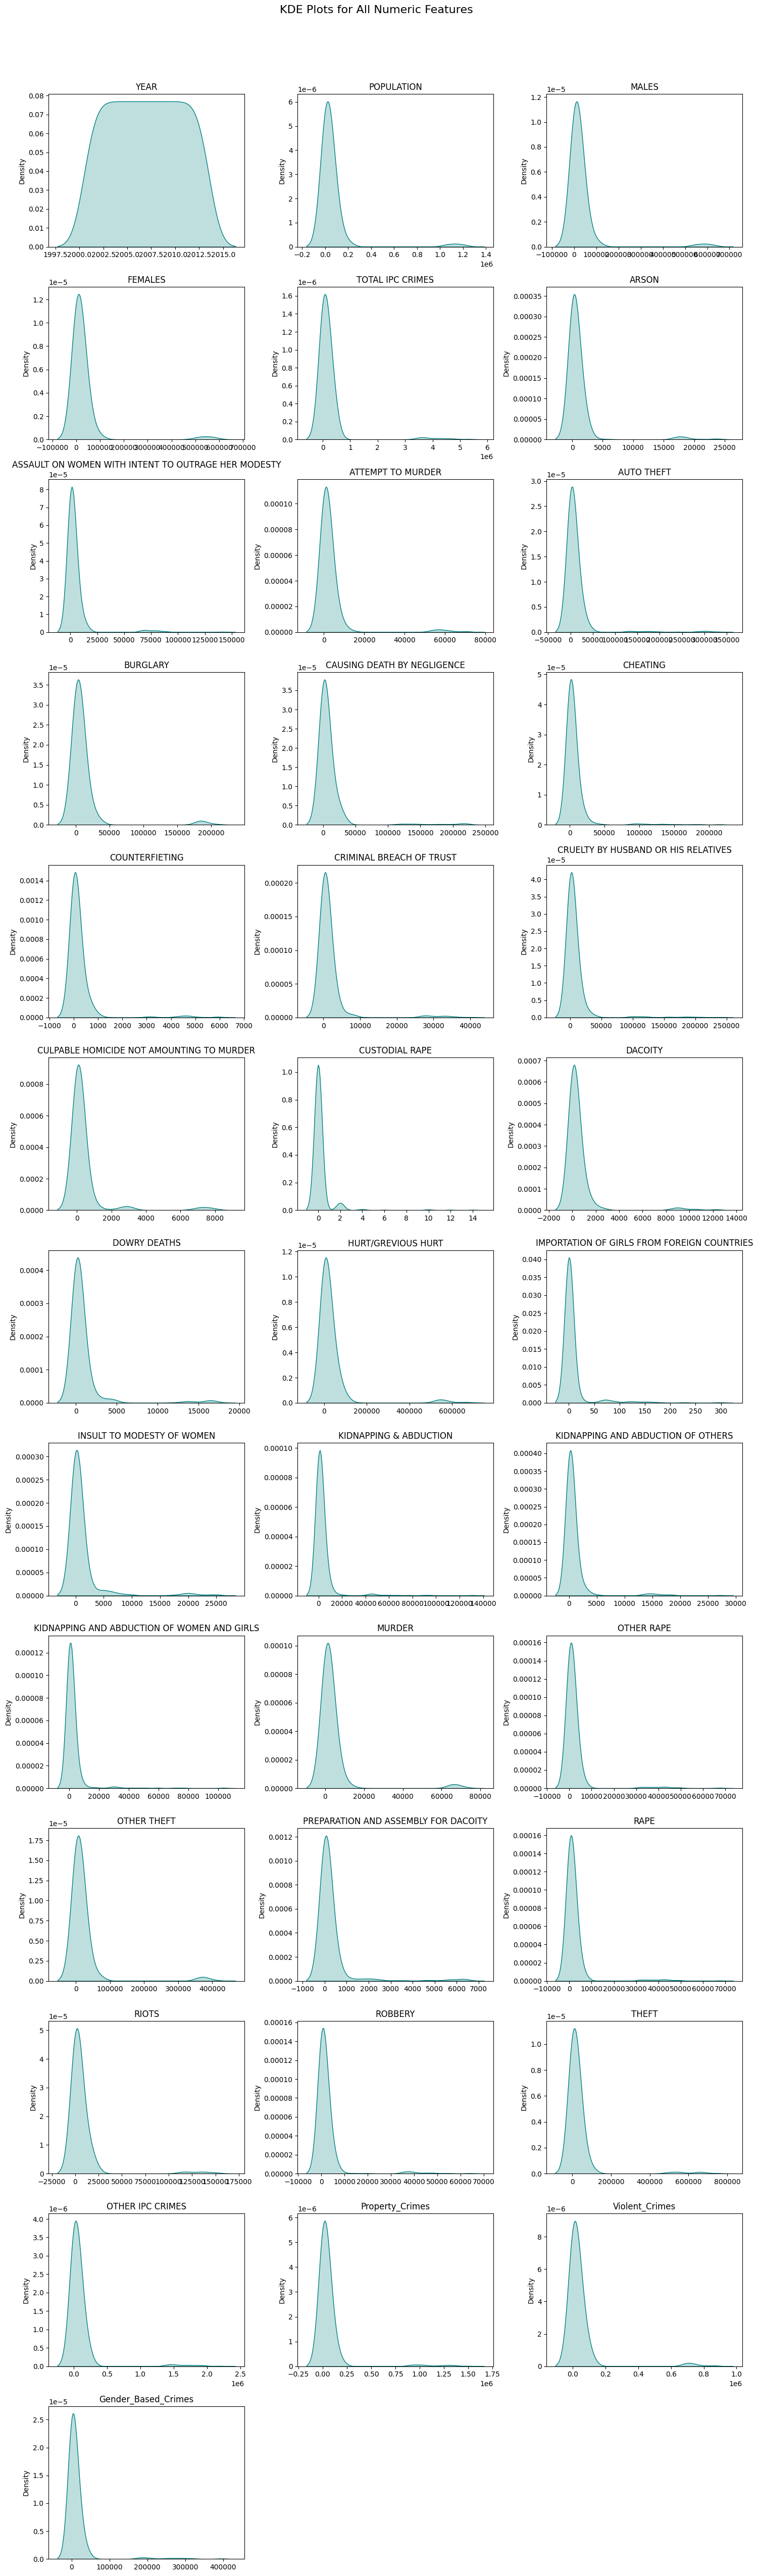

In [18]:
# --- 3. KDE Plots for Numeric Features--
# numeric columns (excluding per_100k for raw counts)
numeric_cols = [col for col in df.select_dtypes(include=["int64", "float64"]).columns if "per_100k" not in col]

# Plot KDE
n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=df, x=col, fill=True, color="teal")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Density")
plt.suptitle("KDE Plots for All Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


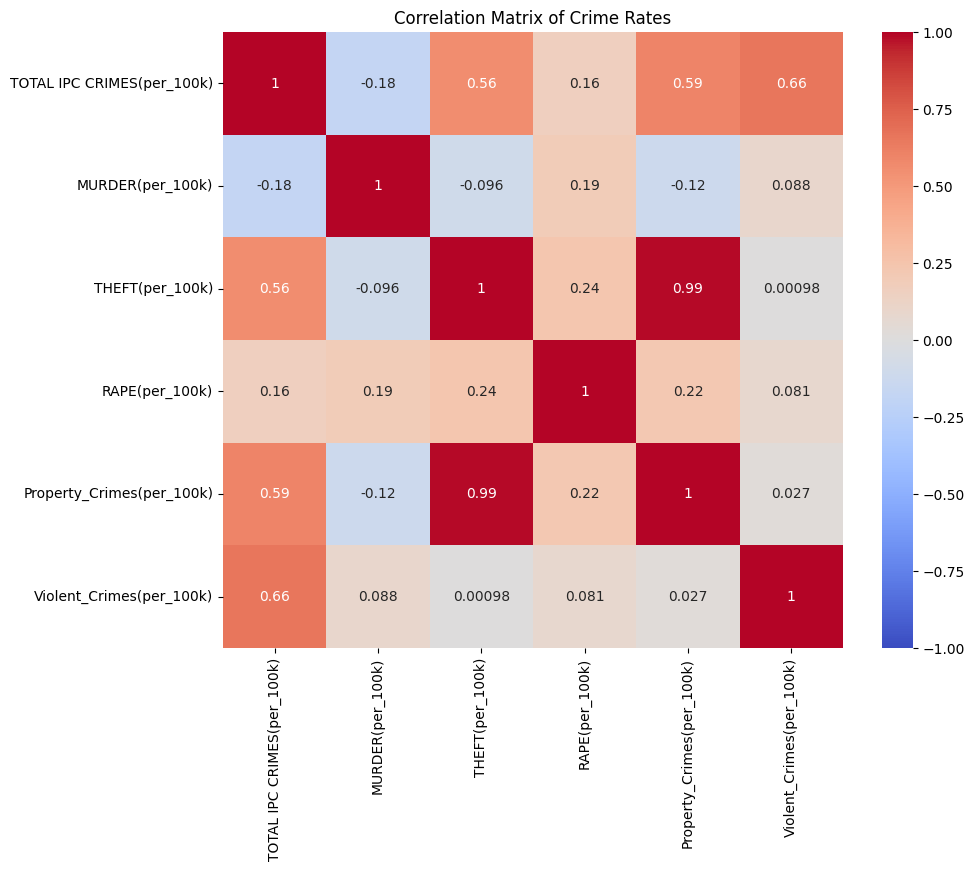

In [ ]:
# --- 4. Correlation Analysis (Using per_100k Columns) ---
key_cols = ['TOTAL IPC CRIMES(per_100k)', 'MURDER(per_100k)', 'THEFT(per_100k)', 
            'RAPE(per_100k)', 'Property_Crimes(per_100k)', 'Violent_Crimes(per_100k)']
corr_matrix = df[key_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Crime Rates")
plt.show()


<Figure size 3000x2400 with 0 Axes>

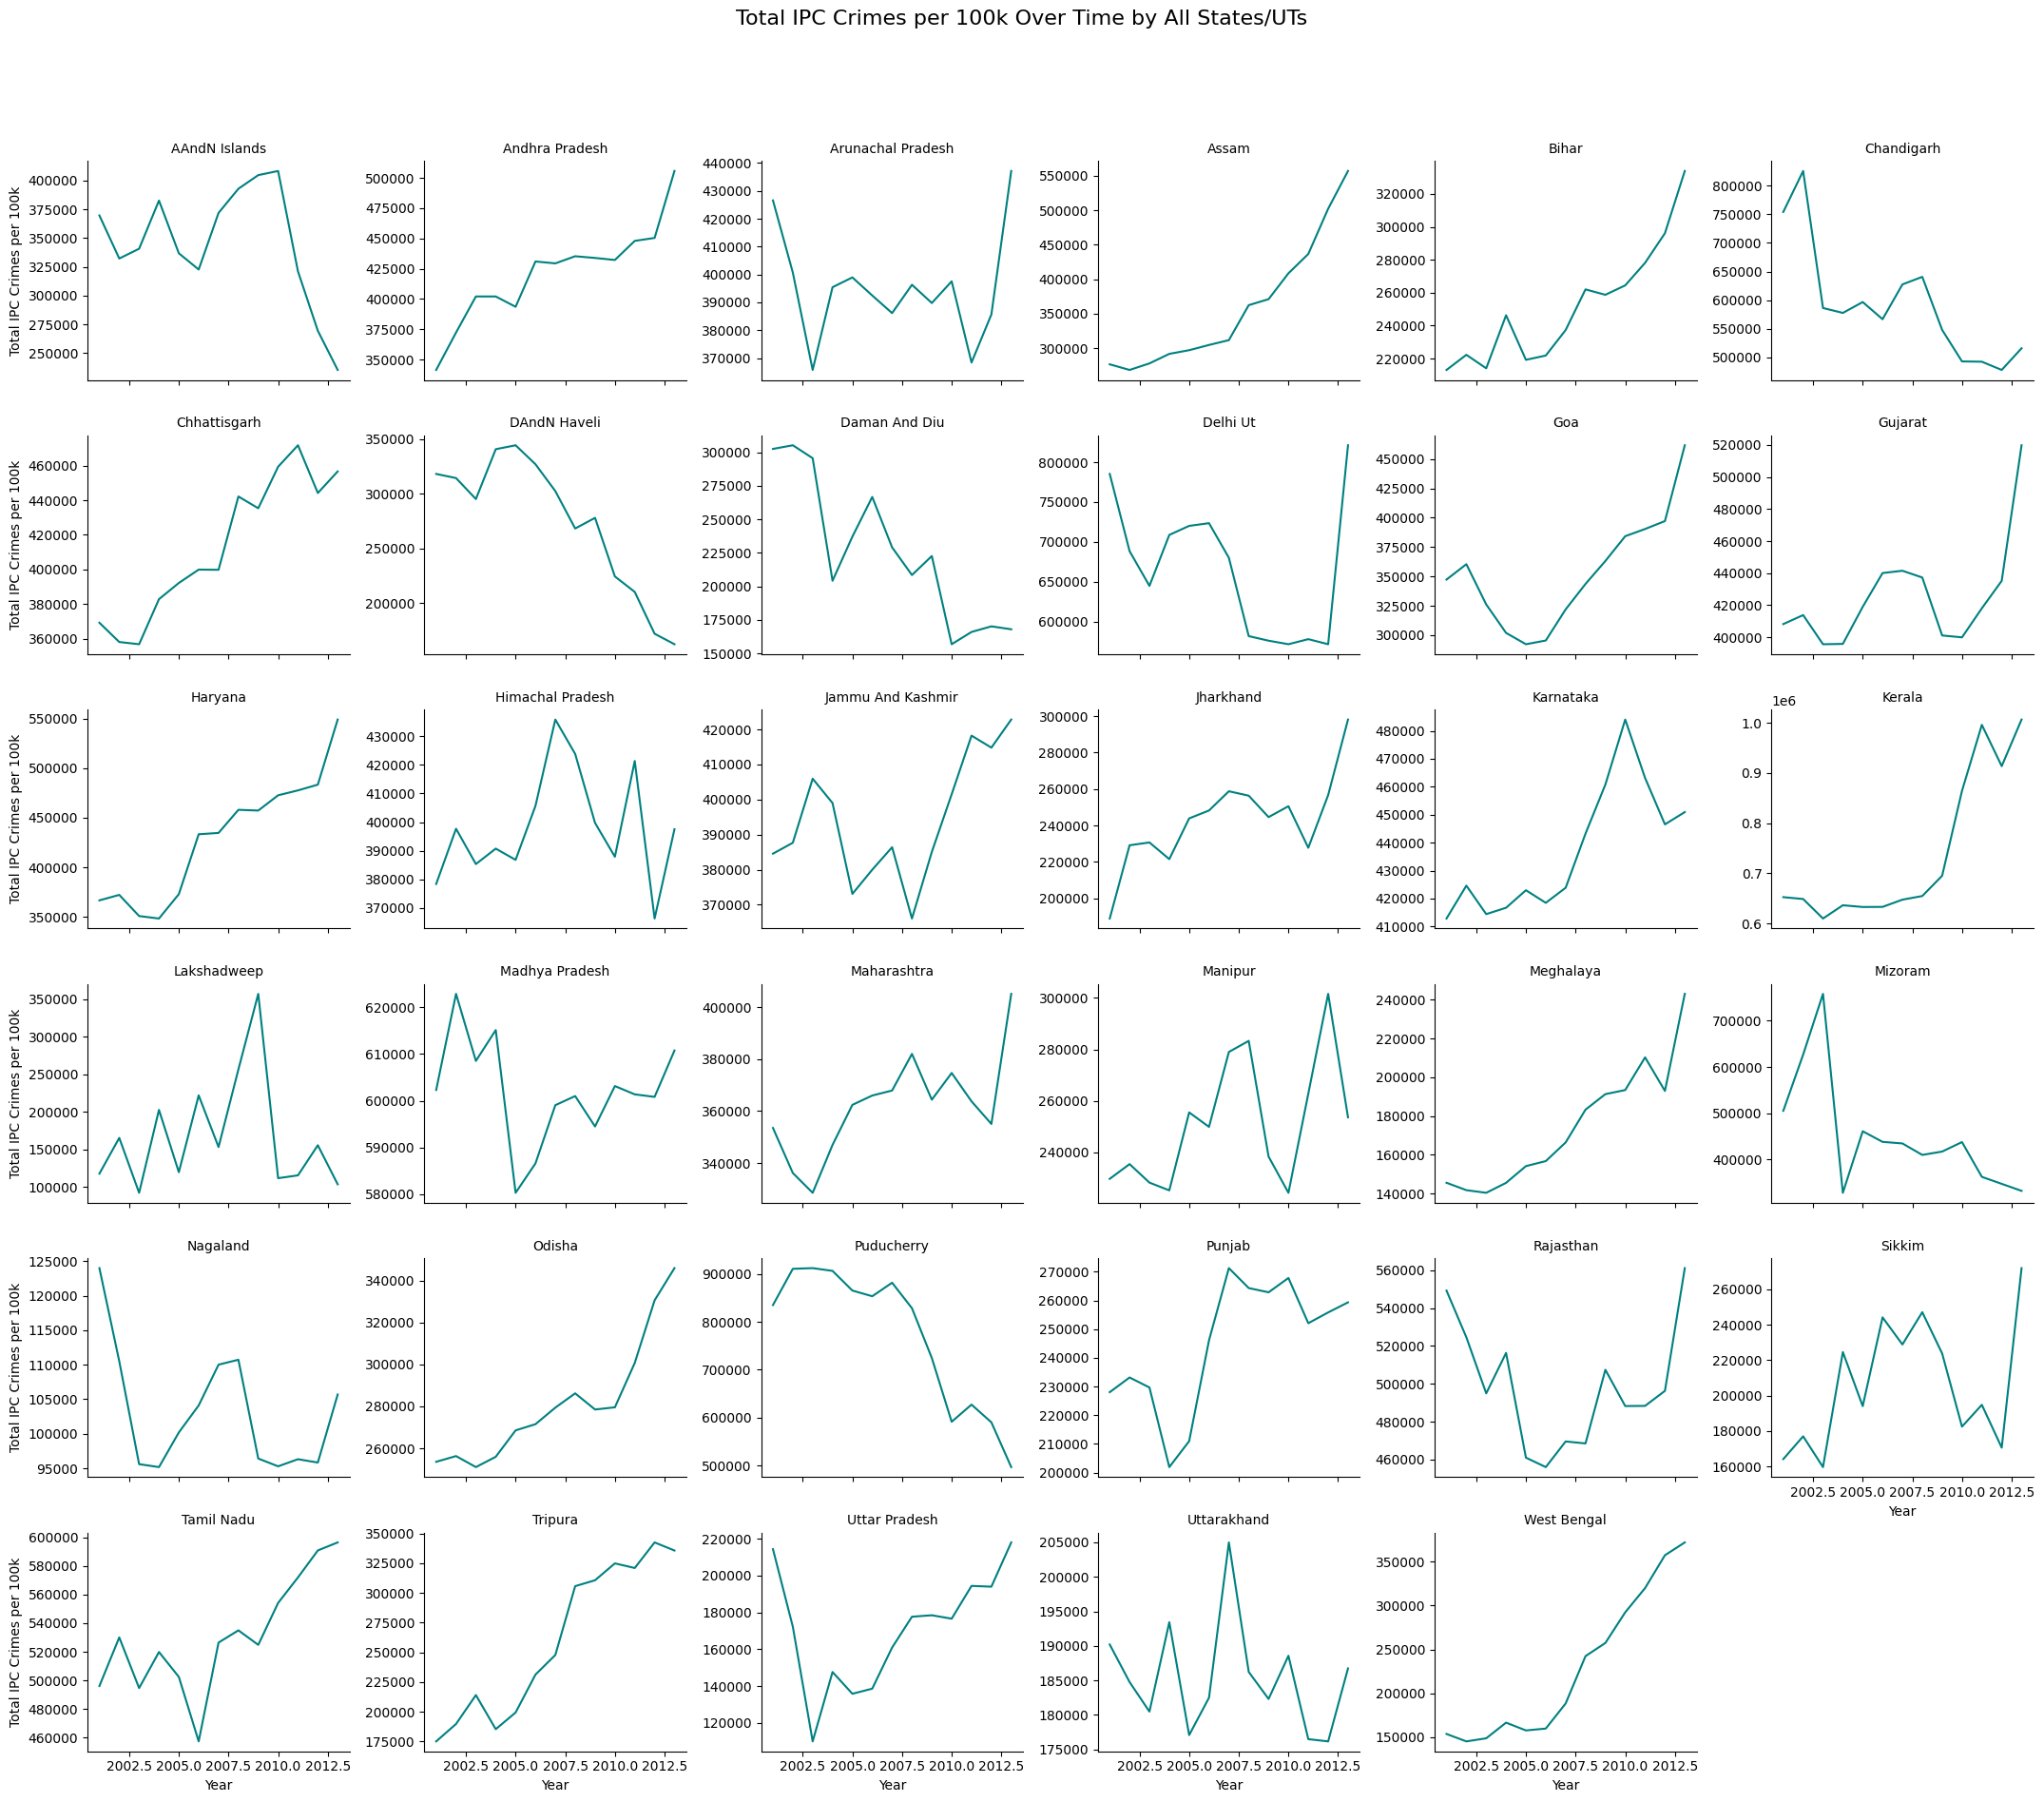

In [22]:
# --- 5. Trend Analysis Over Time (Using per_100k) ---
# Plot total IPC crimes over time by state
all_states = df['STATE/UT'].unique()

# Create a faceted line plot for all states/UTs
n_states = len(all_states)
n_cols = 6  # Number of columns (adjustable, e.g., 6 fits well for 36 states)
n_rows = -(-n_states // n_cols)  # Ceiling division to determine rows

plt.figure(figsize=(5 * n_cols, 4 * n_rows))
g = sns.FacetGrid(df, col='STATE/UT', col_wrap=n_cols, height=3, aspect=1.2, sharey=False)
g.map(sns.lineplot, 'YEAR', 'TOTAL IPC CRIMES(per_100k)', color='teal')
g.set_axis_labels('Year', 'Total IPC Crimes per 100k')
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Total IPC Crimes per 100k Over Time by All States/UTs', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

Explained Variance Ratio: [0.43856882 0.2219042 ]


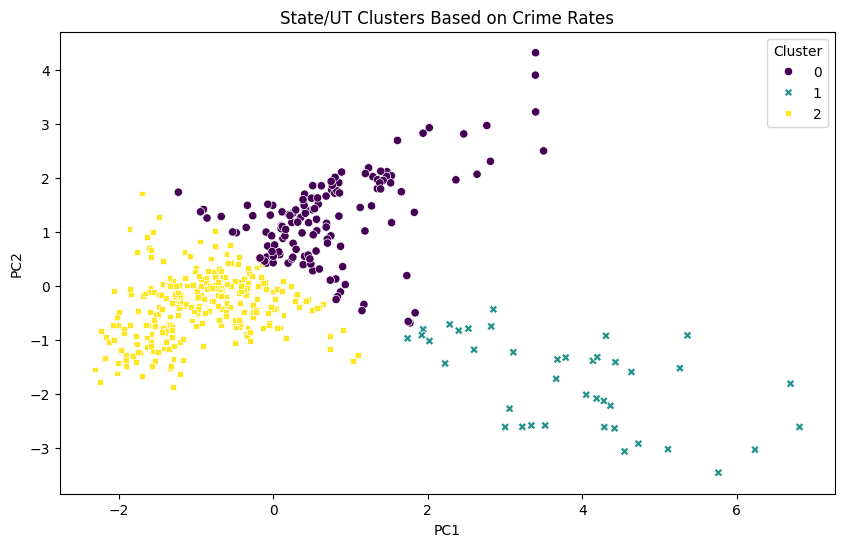

Cluster Summary:
         TOTAL IPC CRIMES(per_100k)  MURDER(per_100k)  RAPE(per_100k)
Cluster                                                              
0                     508527.875452       6892.556566     5331.758323
1                     576306.526070       5695.506614     8324.659687
2                     263732.574214       6497.554759     3845.484840


In [25]:
# --- 6. Clustering States by Crime Profile ---
# Select features for clustering (per_100k for normalized comparison)
features = df[['TOTAL IPC CRIMES(per_100k)', 'MURDER(per_100k)', 'THEFT(per_100k)', 
              'RAPE(per_100k)', 'Property_Crimes(per_100k)', 'Violent_Crimes(per_100k)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(pca_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], style=df['Cluster'], palette='viridis')
plt.title("State/UT Clusters Based on Crime Rates")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Summarize clusters
print("Cluster Summary:")
print(df.groupby('Cluster')[['TOTAL IPC CRIMES(per_100k)', 'MURDER(per_100k)', 'RAPE(per_100k)']].mean())
